<a href="https://colab.research.google.com/github/pavanramsaiganesh/SCT_DS_4/blob/main/task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving accident_prediction_india.csv to accident_prediction_india.csv


/tmp/ipython-input-494030671.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df["Time of Day"], errors="coerce").dt.hour



✅ Model Accuracy: 0.2702127659574468

Confusion Matrix:
 [[46 72 43]
 [64 46 48]
 [60 56 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.29      0.28       161
           1       0.26      0.29      0.28       158
           2       0.28      0.23      0.25       151

    accuracy                           0.27       470
   macro avg       0.27      0.27      0.27       470
weighted avg       0.27      0.27      0.27       470



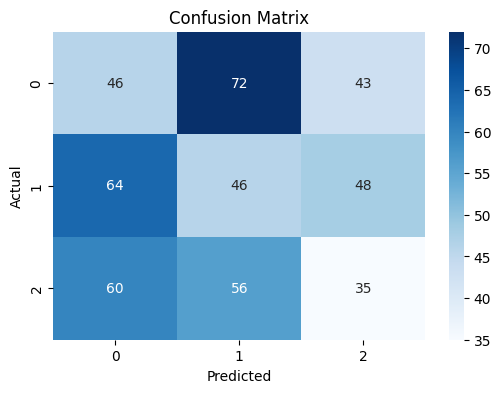

/tmp/ipython-input-494030671.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")


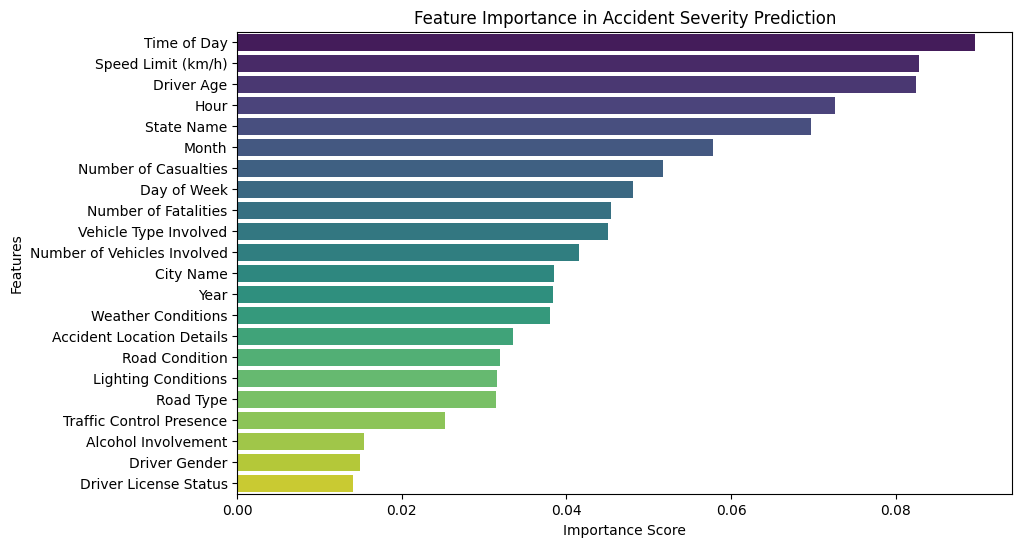

In [1]:
# --- Install dependencies ---
!pip install scikit-learn pandas seaborn matplotlib

# --- Import Libraries ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Load Dataset ---
from google.colab import files
uploaded = files.upload()   # Upload accident_prediction_india.csv
df = pd.read_csv("accident_prediction_india.csv")

# --- Data Cleaning ---
df.dropna(inplace=True)

# Extract hour from "Time of Day"
if "Time of Day" in df.columns:
    df["Hour"] = pd.to_datetime(df["Time of Day"], errors="coerce").dt.hour

# --- Encode Categorical Variables ---
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# --- Define Features & Target ---
X = df.drop("Accident Severity", axis=1)
y = df["Accident Severity"]

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- Random Forest Model ---
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# --- Predictions ---
y_pred = clf.predict(X_test)

# --- Evaluation ---
print("\n✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix Heatmap ---
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# --- Feature Importance ---
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Feature Importance in Accident Severity Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
